# Analysis of HAJ Hannover Halfmarathon 2019

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nbimporter
from src import scraper

def hour_to_decimal(hour: str) -> float:
    digits = hour.split(':')
    return int(digits[0]) + int(digits[1]) / 60.0 + int(digits[2]) / 6000.0

def histogram(columns, header, xlabel, ylabel='Frequency'):
    for column in columns:
        plt.hist(column, bins=50, rwidth=0.85, alpha=0.4)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(header)
    plt.show()


AGE_CLASSES = {
    '–': -1,
    'JU18': 0,
    'JU20': 1,
    'HK': 2,
    '30': 3,
    '35': 4,
    '40': 5,
    '45': 6,
    '50': 7,
    '55': 8,
    '60': 9,
    '65': 10,
    '70': 11,
    '75': 12,
    '80': 13,
    'M85': 14,
}
data_m = pd.read_csv(scraper.get_csv(2019, 'M'), delimiter=scraper.DELIMITER)
data_w = pd.read_csv(scraper.get_csv(2019, 'W'), delimiter=scraper.DELIMITER)
data_m['Finish_decimal'] = data_m['Finish'].apply(hour_to_decimal)
data_w['Finish_decimal'] = data_w['Finish'].apply(hour_to_decimal)

https://hannover.r.mikatiming.de/2018/?page=1&event=HM&num_results=100&pid=list&search[sex]=M&search[age_class]=%
['Place', 'Pl.AC', 'Name', 'Number', 'AC', 'Club', 'Finish']
['1', '1', 'Meier, Karsten (GER)', '8594', 'HK', 'LG Braunschweig', '01:05:23']
['2', '2', 'Nerkamp, Jens (GER)', '5119', 'HK', 'PSV Grün-Weiß Kassel', '01:05:27']
['3', '3', 'Baar, Philipp (GER)', '3001', 'HK', 'ART Düsseldorf', '01:05:49']
['4', '4', 'Gröschel, Tom (GER)', '8379', 'HK', 'Tc Fiko Rostock', '01:06:21']
['5', '1', 'Schreindl, Tobias (GER)', '8390', '30', 'LG Passau', '01:06:29']
['6', '5', 'Pfeiffer, Hendrik (GER)', '3002', 'HK', 'TV Wattenscheid 01', '01:06:59']
['7', '6', 'Weldaj, Haftom (ERI)', '7672', 'HK', 'TSV PATTENSEN', '01:07:01']
['8', '2', 'Wernsdörfer, Mario (GER)', '8760', '30', 'LG Bamberg', '01:07:10']
['9', '7', 'Göhler, Timo (GER)', '8039', 'HK', 'LAV Stadtwerke Tübingen', '01:07:17']
['10', '3', 'Schmidt, Paul (GER)', '8046', '30', 'ART Düsseldorf', '01:07:41']
['11', '8', 'Scherr

## Overview men an women

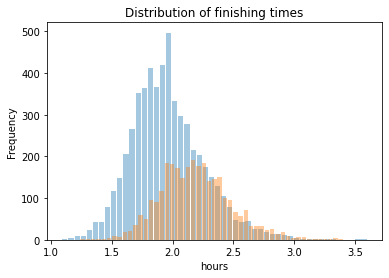

In [13]:
histogram([data_m['Finish_decimal'], data_w['Finish_decimal']], 'Distribution of finishing times', 'hours')

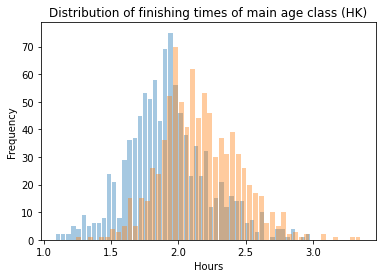

In [14]:
main_age_class_m = data_m[data_m['AC'] == 'HK']
main_age_class_w = data_w[data_w['AC'] == 'HK']
histogram([main_age_class_m['Finish_decimal'], main_age_class_w['Finish_decimal']], 'Distribution of finishing times of main age class (HK)', 'Hours')

## Detail analysis men

### Top and worst placements

In [15]:
data_m.head()

,Place,Pl.AC,Name,Number,AC,Club,Finish,Finish_decimal
0,1,1,"Gröschel, Tom (GER)",20623,HK,Tc Fiko Rostock,01:05:25,1.087500
1,2,2,"Weldaj, Haftom (GER)",24434,HK,TSV Pattensen,01:06:22,1.103667
2,3,3,"Karsch, Dustin (GER)",24722,HK,Osnabrücker TB,01:09:08,1.151333
3,4,4,"Riechers, Nicolai (GER)",24698,HK,Osnabrücker TB,01:09:09,1.151500
4,5,1,"Knutzen, Jan (GER)",25738,30,SG akquinet Lemwerder,01:09:58,1.159667


In [16]:
data_m.tail()

,Place,Pl.AC,Name,Number,AC,Club,Finish,Finish_decimal
5592,5593,5,"Dr. Kloweit-Herrmann, Manfred (GER)",26710,80,SC Melle 03,03:15:40,3.256667
5593,5594,197,"Kaletsch, Heinz (GER)",25441,60,Artiva Athletix Team,03:19:16,3.319333
5594,5595,198,"Marzian, Wolfgang (GER)",23362,60,keiner,03:20:49,3.341500
5595,5596,476,"Fuhlenriede, Armin (GER)",24973,55,Hannover Runners e. V.,03:31:59,3.526500
5596,5597,762,"Schönfeld, Robert (GER)",24680,50,Sport mit Depressionen,03:36:06,3.601000


### Average finish times

In [17]:
data_m.groupby('AC').mean()

,Place,Finish_decimal
AC,,
30,2662.113054,1.930523
35,2542.425756,1.916884
40,2688.408618,1.940968
45,2849.163833,1.974180
50,2881.569554,1.979186
55,3186.995798,2.030036
60,3410.762626,2.087944
65,3832.183908,2.156822
70,4145.941176,2.233108


### Number of people in age class

<AxesSubplot:>

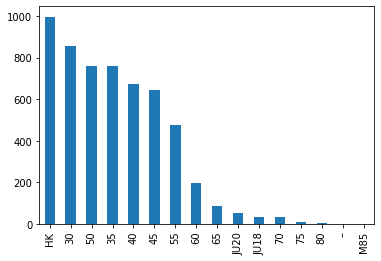

In [18]:
data_m['AC'].value_counts().plot.bar()

### Distribution of finishing times in age classes

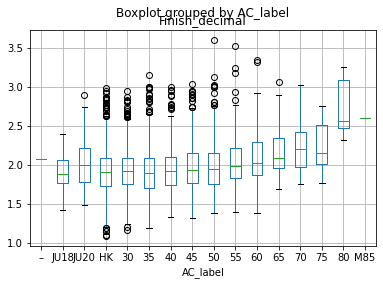

In [19]:
# add map age classes to integers
data_m['AC_label'] = data_m['AC']
data_m['AC_label'] = data_m.AC.replace(AGE_CLASSES)

data_m.boxplot(by='AC_label', column='Finish_decimal')
plt.xticks(range(1, len(AGE_CLASSES) + 1), list(AGE_CLASSES.keys()))
plt.show()

### Correlation of numeric colums

In [20]:
data_m.corr()

,Place,Finish_decimal,AC_label
Place,1.000000,0.956946,0.147725
Finish_decimal,0.956946,1.000000,0.159629
AC_label,0.147725,0.159629,1.000000
